In [72]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import plot
from matplotlib import rcParams
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, OPTICS

warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = (8,7)

In [73]:
df = pd.read_csv('Pizza.csv')
print('Pizza data set size is:', df.shape)

Pizza data set size is: (300, 9)


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   brand   300 non-null    object 
 1   id      300 non-null    int64  
 2   mois    300 non-null    float64
 3   prot    300 non-null    float64
 4   fat     300 non-null    float64
 5   ash     300 non-null    float64
 6   sodium  300 non-null    float64
 7   carb    300 non-null    float64
 8   cal     300 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 21.2+ KB


In [75]:
df.isnull().sum() + df.isna().sum()

brand     0
id        0
mois      0
prot      0
fat       0
ash       0
sodium    0
carb      0
cal       0
dtype: int64

In [76]:
df_numeric = df.select_dtypes(exclude=['object']).drop(columns=['id'], axis=1)

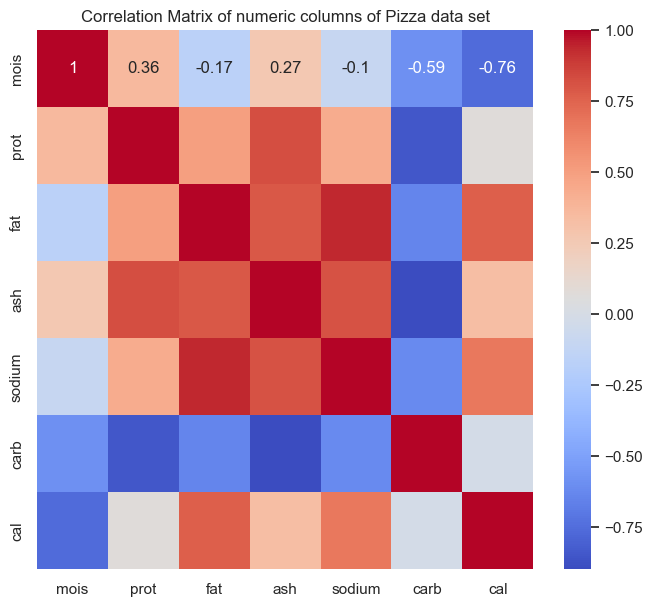

In [77]:
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of numeric columns of Pizza data set')
plt.show()

# Correlation Matrix Analysis of Pizza Dataset

Below is the correlation matrix for a dataset containing various attributes of pizza. Each cell in the matrix represents the Pearson correlation coefficient between two variables. The correlation coefficient ranges from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.

\[
\begin{array}{c|ccccccc}
\text{} & \text{mois} & \text{prot} & \text{fat} & \text{ash} & \text{sodium} & \text{carb} & \text{cal} \\
\hline
\text{mois} & 1.000000 & 0.360248 & -0.171318 & 0.265556 & -0.102279 & -0.591802 & -0.764441 \\
\text{prot} & 0.360248 & 1.000000 & 0.498002 & 0.823844 & 0.429130 & -0.853542 & 0.070258 \\
\text{fat} & -0.171318 & 0.498002 & 1.000000 & 0.791634 & 0.933325 & -0.640238 & 0.764567 \\
\text{ash} & 0.265556 & 0.823844 & 0.791634 & 1.000000 & 0.808122 & -0.898988 & 0.326468 \\
\text{sodium} & -0.102279 & 0.429130 & 0.933325 & 0.808122 & 1.000000 & -0.620176 & 0.671958 \\
\text{carb} & -0.591802 & -0.853542 & -0.640238 & -0.898988 & -0.620176 & 1.000000 & -0.023485 \\
\text{cal} & -0.764441 & 0.070258 & 0.764567 & 0.326468 & 0.671958 & -0.023485 & 1.000000 \\
\end{array}
\]

## Insights from the Correlation Matrix

1. **Moisture (mois)**:
   - Negatively correlated with fat (-0.171), carbohydrates (-0.592), and calories (-0.764).
   - Weak positive correlation with protein (0.360), ash (0.266), and sodium (0.102).

2. **Protein (prot)**:
   - Strong positive correlation with ash (0.824).
   - Moderate positive correlation with fat (0.498) and sodium (0.429).
   - Strong negative correlation with carbohydrates (-0.854).

3. **Fat (fat)**:
   - Strong positive correlation with sodium (0.933) and calories (0.765).
   - Strong positive correlation with ash (0.792).
   - Moderate negative correlation with carbohydrates (-0.640).

4. **Ash (ash)**:
   - Strong positive correlation with protein (0.824), fat (0.792), and sodium (0.808).
   - Strong negative correlation with carbohydrates (-0.899).
   - Moderate positive correlation with calories (0.326).

5. **Sodium (sodium)**:
   - Very strong positive correlation with fat (0.933).
   - Strong positive correlation with ash (0.808) and calories (0.672).
   - Moderate negative correlation with carbohydrates (-0.620).

6. **Carbohydrates (carb)**:
   - Strong negative correlation with protein (-0.854), fat (-0.640), ash (-0.899), and sodium (-0.620).
   - No significant correlation with calories (-0.023).

7. **Calories (cal)**:
   - Strong negative correlation with moisture (-0.764).
   - Strong positive correlation with fat (0.765) and sodium (0.672).
   - Weak positive correlation with ash (0.326).
   - No significant correlation with protein (0.070) and carbohydrates (-0.023).

## Summary

- Moisture content in pizzas tends to be lower in those with higher fat, carbohydrate, and calorie content.
- Protein and ash contents are strongly correlated, suggesting that pizzas with more protein also tend to have more ash.
- High fat content is strongly associated with higher sodium and calorie content.
- Carbohydrates have a strong inverse relationship with most other components, except for calories where the correlation is negligible.
- Sodium is a strong indicator of higher fat and calorie content in pizzas.
rong indicator of higher fat and calorie content in pizzas.


<Figure size 2000x1000 with 0 Axes>

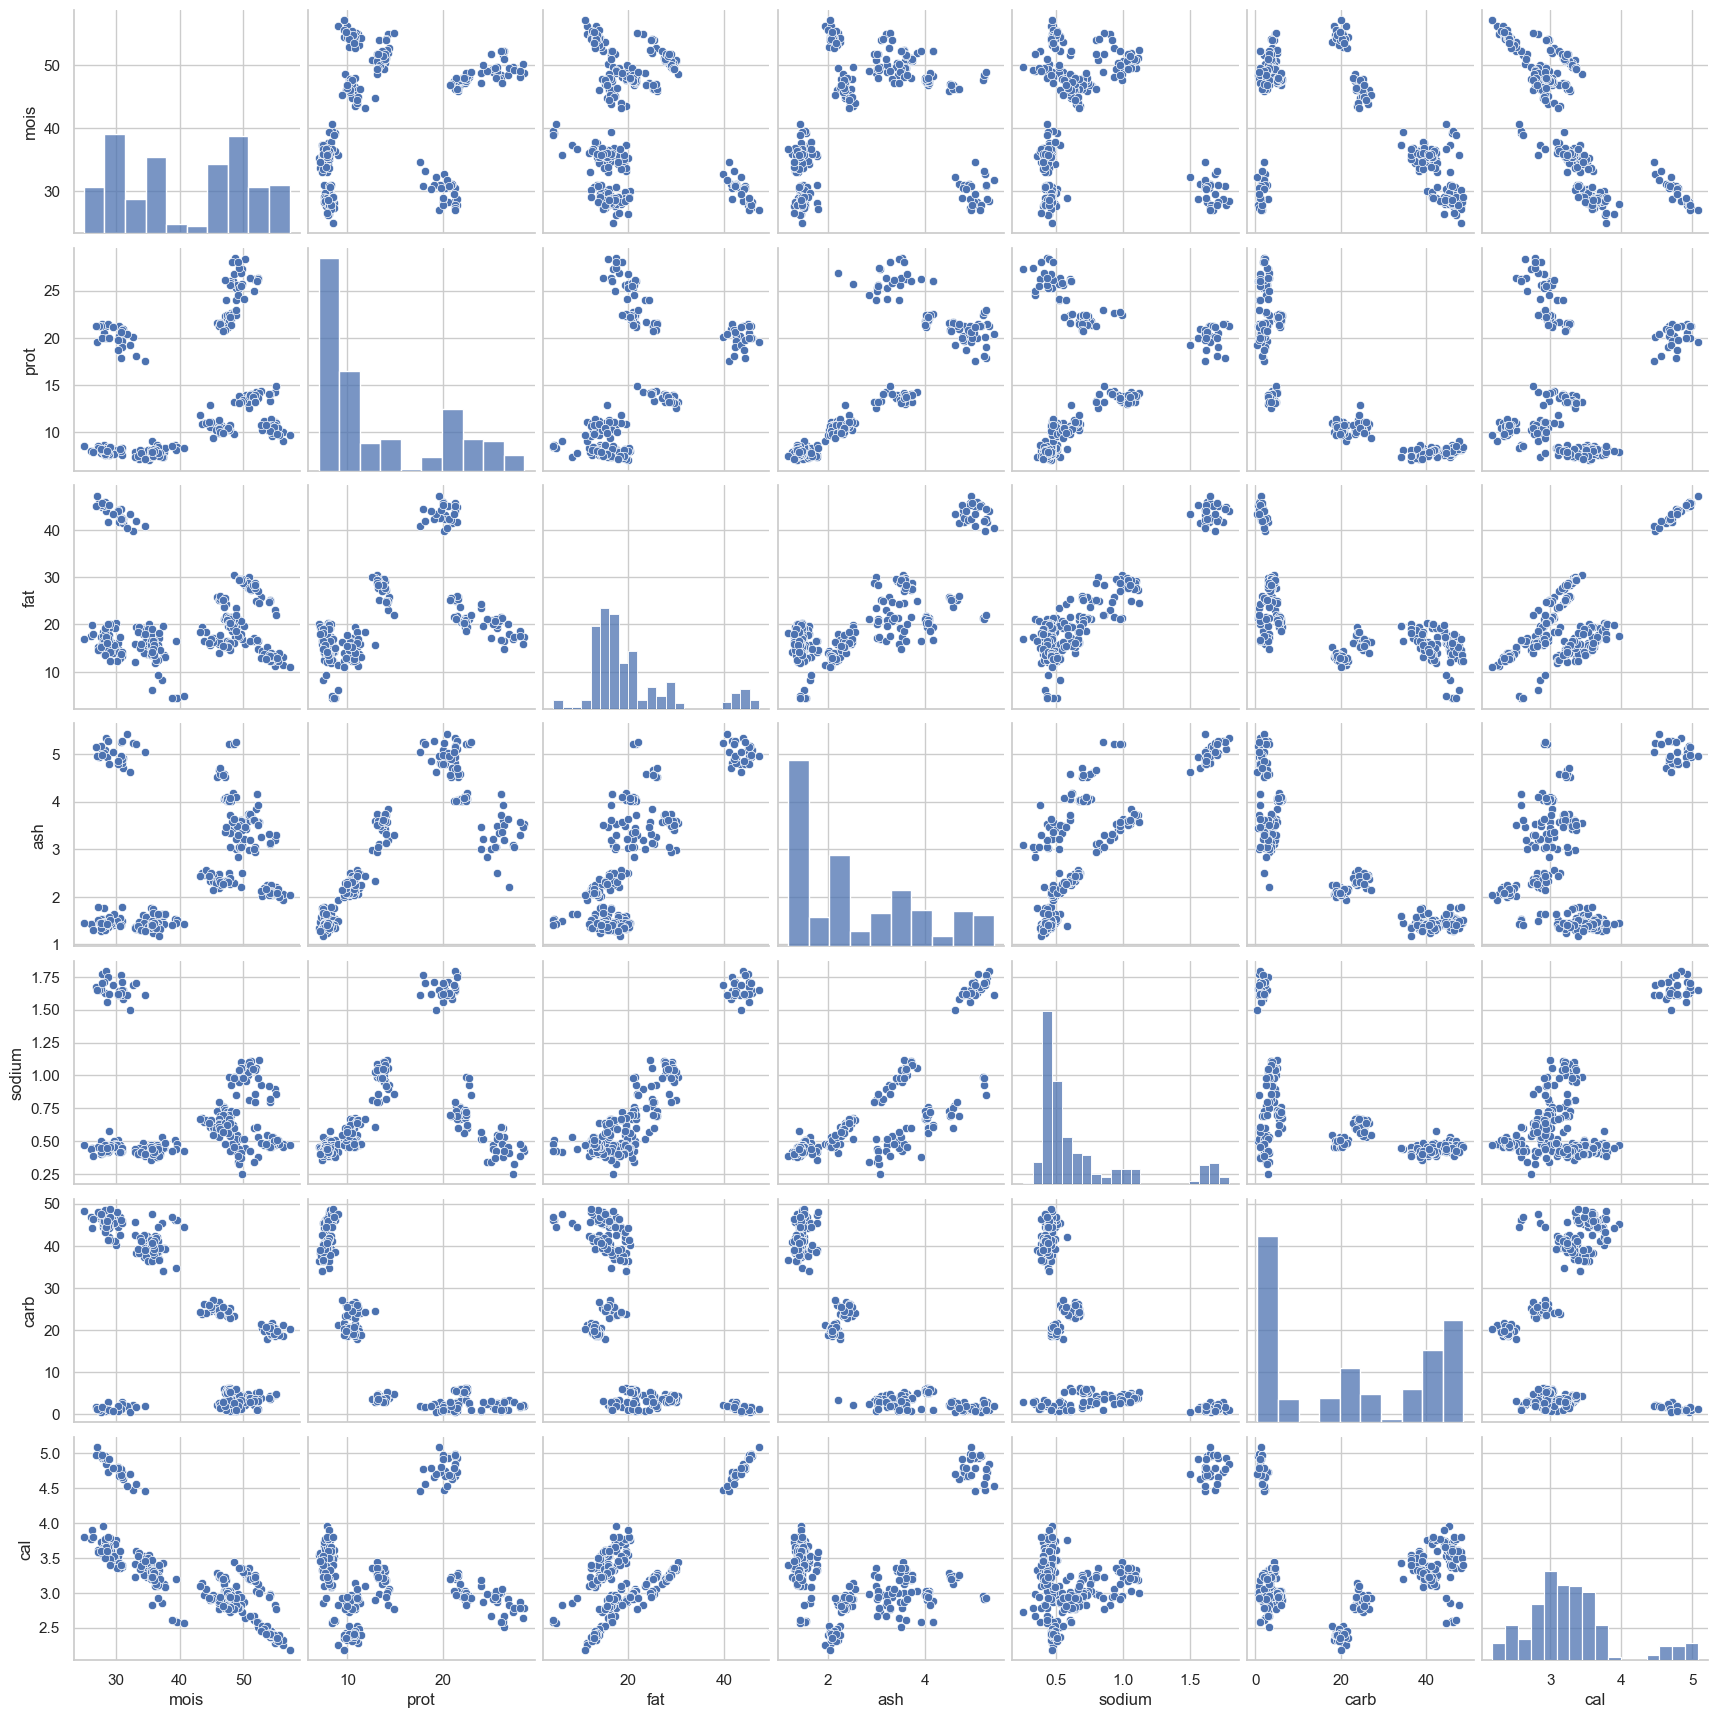

In [78]:
plt.figure(figsize=(20,10))
sns.pairplot(df_numeric)
plt.show()

### We have different scale in our dataset, that's why we are going to use Standardization to make them in equal scale

In [79]:
std_scalar = StandardScaler()
X = std_scalar.fit_transform(df_numeric)

### Finding the optimal dimension number to reduce using variance ratio

In [80]:
var_ratio = np.zeros(shape=(X.shape[1], 1))
n_components = np.arange(X.shape[1])

for i in n_components:
    pca = PCA(n_components=i)
    pca.fit(X)
    var_ratio[i] = np.sum(pca.explained_variance_ratio_)

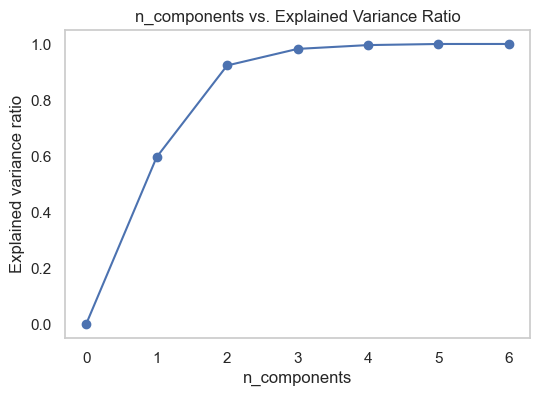

In [81]:
plt.figure(figsize=(6,4))
plt.grid()
plt.plot(n_components,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')
plt.show()

# PCA Variance Ratio Analysis

The following array represents the cumulative variance ratio explained by each principal component in a Principal Component Analysis (PCAend{array}
\]

## Insights

1. **Component 0**:
   - Explains 0% of the variance.
   - This is a baseline and does not contribute to explaining the data variance.

2. **Component 1**:
   - Explains approximately 59.60% of the variance.
   - The first principal component captures a significant portion of the total variance in the dataset, indicating it is very effective in summarizing the information.

3. **Component 2**:
   - The cumulative variance explained increases to about 92.32%.
   - By adding the second principal component, we capture an additional 32.72% of the variance, significantly enhancing the explanatory power.

4. **Component 3**:
   - The cumulative variance explained reaches approximately 98.24%.
   - The third principal component contributes an additional 5.92% of the variance, indicating diminishing returns with each additional component.

5. **Component 4**:
   - The cumulative variance explained is approximately 99.60%.
   - This component adds about 1.36% more of the variance, showing that most of the significant variance is already captured by the first three components.

6. **Component 5**:
   - The cumulative variance explained is approximately 99.99%.
   - The fifth principal component contributes a marginal 0.44% of the variance, suggesting very little additional information is being captured.

7. **Component 6**:
   - Explains nearly 100% of the variance (99.9999%).
   - Adding the sixth component provides almost no additional explanatory power.

## Summary

- The first three principal components explain the majority of the variance in the dataset (98.24%).
- Adding more components beyond the third yields diminishing returns, with very little additional variance explained.
- This analysis suggests that a reduced dimensionality of three principal components would be effective in capturing most of the information in the dataset, providing abalance between simplicity and explanatory power.


In [82]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

### Ploting 3D using matplotlib

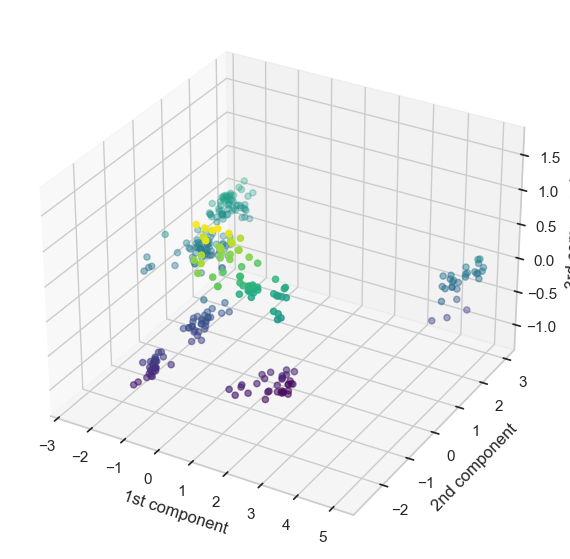

In [83]:
sns.set(style="whitegrid")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:,0], X_pca[:, 1], X_pca[:, 2], c=X_pca[:, 2], cmap='viridis')
ax.set_xlabel('1st component')
ax.set_ylabel('2nd component')
ax.set_zlabel('3rd component')
plt.show()

### Ploting 3D interactive using plotly

In [84]:
fig = go.Figure(data=[go.Scatter3d(x=X_pca[:,0], y=X_pca[:, 1], z=X_pca[:, 2], mode='markers')])
fig.update_layout(scene=dict(
                    xaxis_title='1st component',
                    yaxis_title='2nd component',
                    zaxis_title='3rd component'),
                  title='3D Scatter Plot of components')

plot(fig, filename='features_plotly.html')
pass

### Clustring

#### First we need to find the optimal clusters number. To do so we use elbow method

In [85]:
sse = [0] * 9
for i in range(1, 10):
    k_mean = KMeans(n_clusters=i, max_iter=500).fit(X_pca)
    sse[i - 1] = k_mean.inertia_

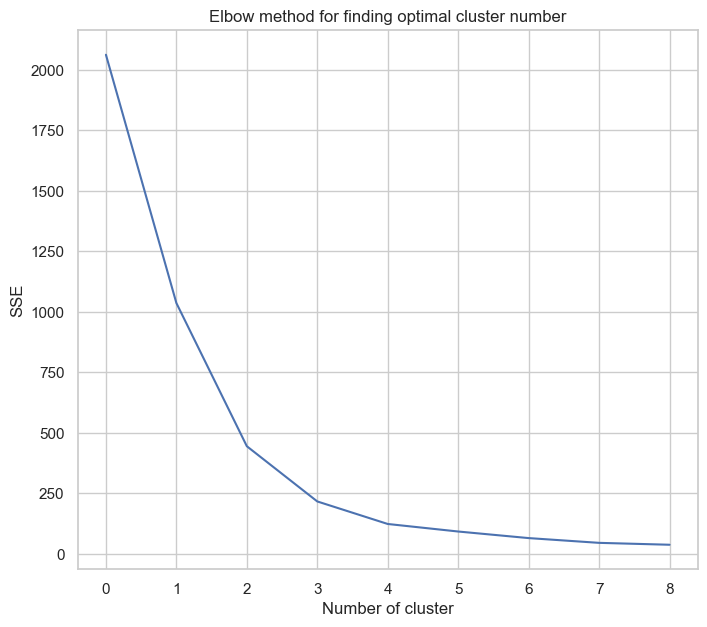

In [86]:
plt.figure()
sns.lineplot(x=np.arange(9), y=np.array(sse))
plt.title('Elbow method for finding optimal cluster number')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

# Insight and Conclusion on K-Means Clustering Inertia

The list provided contains the inertia values for different numbers of clusters obtained from K-means clustering. Here's a breakdown of the inertia values:

- 0 clusters: 2063.040
- 1 cluster: 1036.836
- 2 clusters: 445.094
- 3 clusters: 216.899
- 4 clusters: 123.780
- 5 clusters: 92.636
- 6 clusters: 65.462
- 7 clusters: 45.789
- 8 clusters: 37.945

## Insight

- **Decreasing Inertia**: As the number of clusters increases, the inertia decreases. This is expected because with more clusters, the data points are closer to their centroids, resulting in lower inertia.
- **Rate of Decrease**: Initially, there's a significant drop in inertia from 0 to 1 cluster, indicating a substantial improvement in clustering performance. However, the rate of decrease slows down as the number of clusters increases, suggesting diminishing returns in terms of clustering quality.
- **Elbow Point**: A common approach for determining the optimal number of clusters is to look for an "elbow point" in the inertia plot, where the rate of decrease significantly slows down. In this case, it seems like the elbow point might be around 3 or 4 clusters, as the decrease in inertia becomes less pronounced after these points.

## Conclusion

Based on the inertia values:

- Choosing 3 or 4 clusters would likely strike a balance between capturing meaningful clusters and avoiding overfitting.
- Beyond 4 clusters, the decrease in inertia becomes less substantial, indicating that additional clusters may not provide significant improvement in clustering quality.
- Further analysis, such as silhouette scores or domain-specific considerations, may be needed to confirm the optimal number of clusters for your specific dataset and objectives.
c dataset and objectives.


### Silhouette Score Analysis
#### Elbow method suggested to use 3 or 4 clusters but by analyzing the graph of the data we can say there is a high chance that Elbow method is not enough for determining the optimal cluster number and for that reason we use Silhouette Score to find the optimal value for cluster number

In [87]:
min_clusters = 2
max_clusters = 10
cluster_range = range(min_clusters, max_clusters + 1)

silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

optimal_cluster_idx = np.argmax(silhouette_scores)
optimal_cluster_num = cluster_range[optimal_cluster_idx]
optimal_score = silhouette_scores[optimal_cluster_idx]

In [88]:
print(f"Optimal number of clusters: {optimal_cluster_num}")
print(f"Average silhouette score: {optimal_score}")

Optimal number of clusters: 5
Average silhouette score: 0.6915883366405499


# Insight and Conclusion on Optimal Cluster Number

The analysis of the K-means algorithm's inertia and silhouette scores provides valuable insights into determining the optimal number of clusters for your dataset.

## Inertia Analysis

- The inertia values represent the within-cluster sum of squares, indicating how compact the clusters are. 
- According to the elbow method, where the inertia starts to decrease at a slower rate, the optimal cluster number is suggested to be around 3 or 4 clusters.
- However, inertia alone may not always provide a clear indication of the optimal cluster number, as it only considers the within-cluster variability.

## Silhouette Score Analysis

- Silhouette score measures both the cohesion within clusters and the separation between clusters, providing a more comprehensive evaluation of clustering quality.
- The silhouette scores indicate the average silhouette width of each sample, with higher scores indicating better-defined clusters.
- In this analysis, the silhouette scores consistently increase with the number of clusters, peaking at 5 clusters.
- The highest silhouette score occurs when using 5 clusters, suggesting that this configuration results in well-defined and distinct clusters.

## Conclusion

- While the elbow method initially suggested 3 or 4 clusters based on inertia, the silhouette score analysis favored using 5 clusters.
- The discrepancy between the two methods highlights the importance of considering multiple metrics and exploring different perspectives when determining the optimal cluster number.
- In this case, the silhouette score analysis provides a more nuanced understanding of the clustering structure in the dataset, leading to the selection of 5 clusters as the optimal configuration.
- It's essential to interpret and compare results from various evaluation metrics to make informed decisions about the number of clusters that best represent the underlying patterns in the data.


### Clustering our data into 5 clusters

In [89]:
X_pca.shape

(300, 3)

In [90]:
k_mean_clustering = KMeans(n_clusters=5, n_init=50, random_state=42)
X_clustered = k_mean_clustering.fit(X_pca)
y_kmeans = k_mean_clustering.predict(X_pca)
centers = k_mean_clustering.cluster_centers_

In [91]:
X_pca_clustered = np.hstack((X_pca, y_kmeans.reshape(-1,1)))

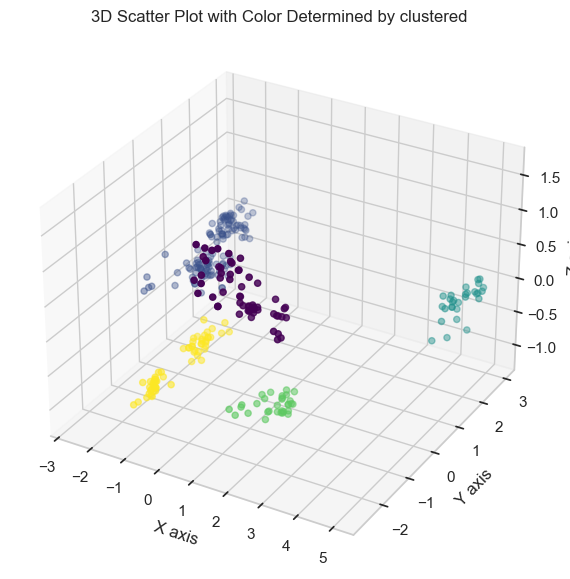

In [92]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca_clustered[:,0], X_pca_clustered[:, 1], X_pca_clustered[:, 2], c=X_pca_clustered[:, 3], cmap='viridis')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Scatter Plot with Color Determined by clustered')
plt.show()

In [93]:
fig = go.Figure(data=[go.Scatter3d(
    x=X_pca_clustered[:, 0], y=X_pca_clustered[:, 1], z=X_pca_clustered[:, 2], 
    mode='markers', 
    marker=dict(
        size=5, 
        color=X_pca_clustered[:, 3], 
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig.update_layout(scene=dict(
                    xaxis_title='1st component',
                    yaxis_title='2nd component',
                    zaxis_title='3rd component'),
                  title='3D Scatter Plot of the Clustered features')

plot(fig, filename='features_plotly_clustered.html')
pass

In [94]:
clusters = pd.DataFrame(y_kmeans, columns=['cluster'])

In [95]:
df_clustered = pd.concat([df_numeric, clusters], axis=1)

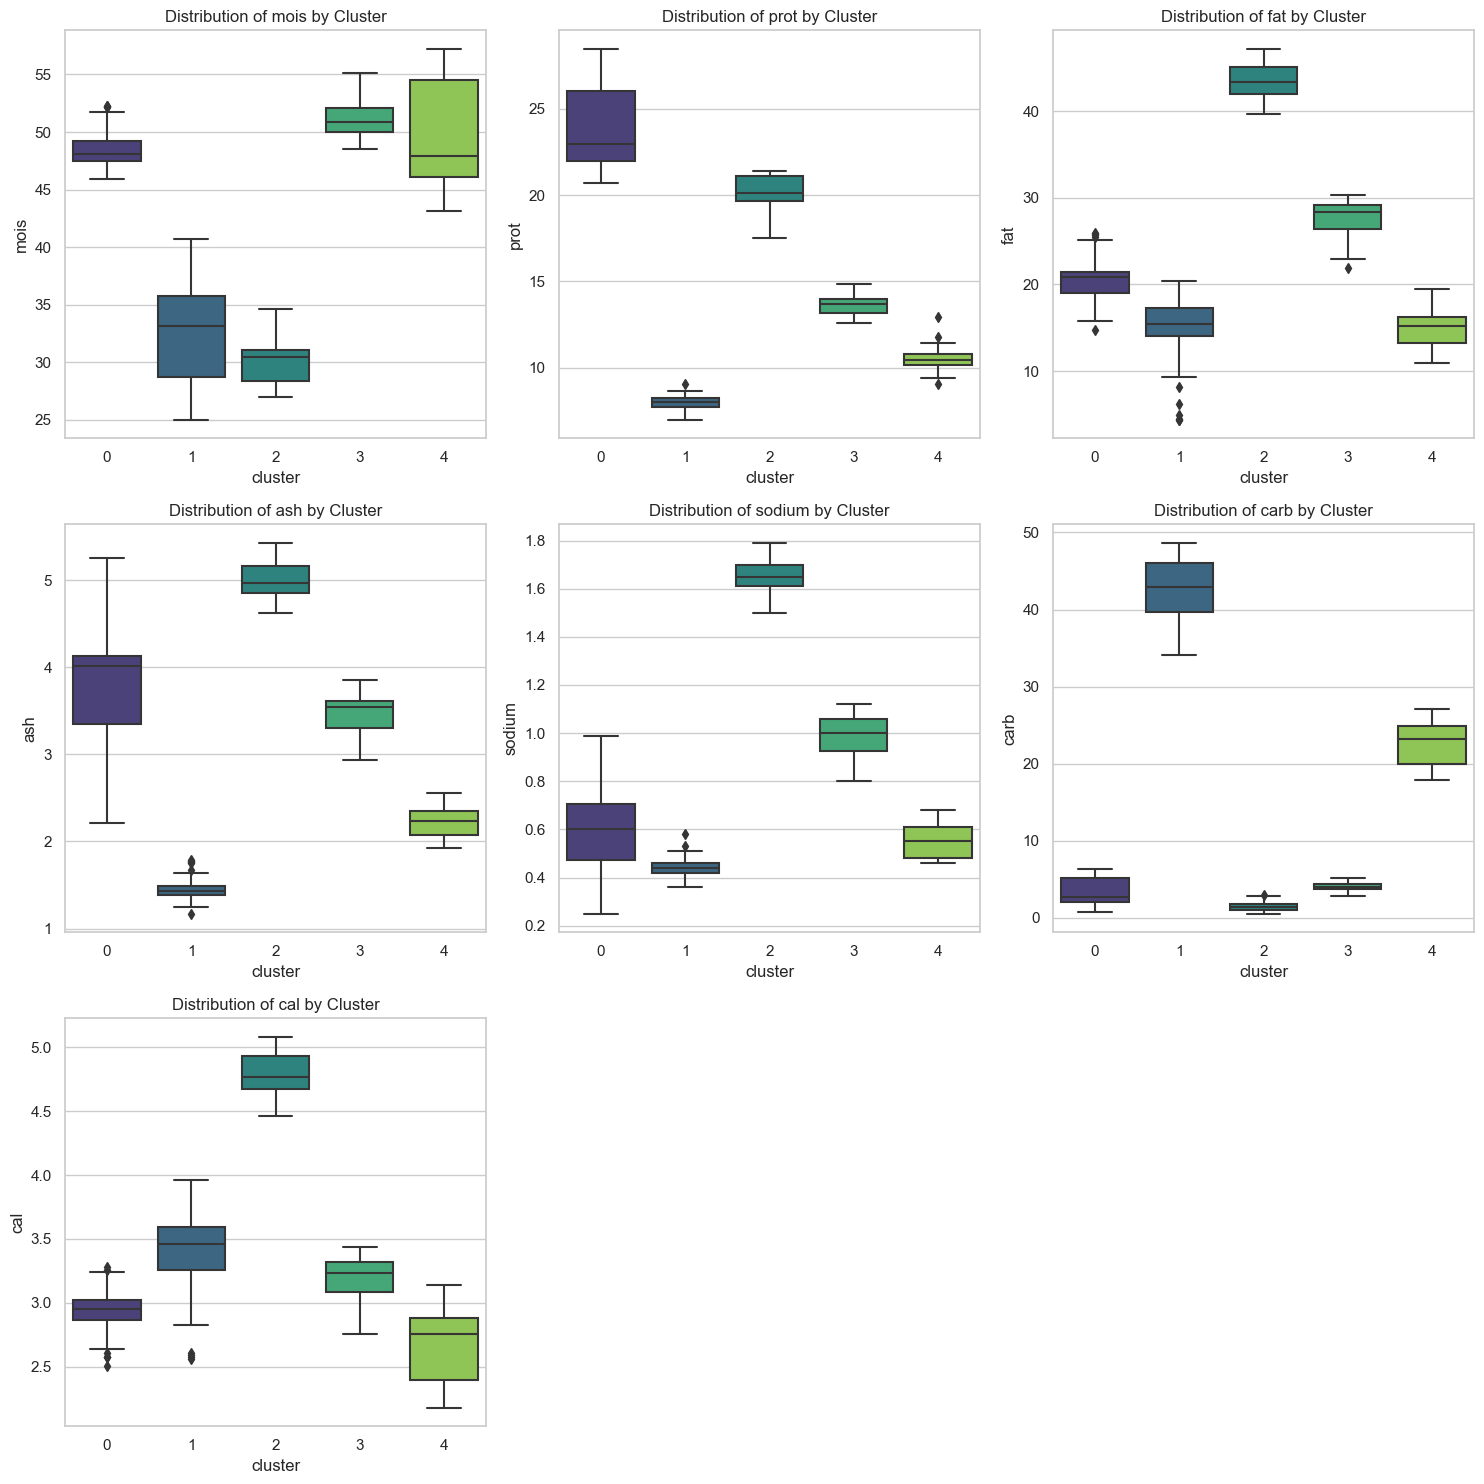

In [96]:
n_cols = 3 
n_rows = int(np.ceil(len(df.columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))
axes = axes.flatten()

for i, column in enumerate(df_clustered.columns[:-1]):  # Exclude the cluster column
    sns.boxplot(x='cluster', y=column, data=df_clustered, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Distribution of {column} by Cluster')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Overall Insights:

#### Cluster 0:
- **Moderate levels**: Across all features.
- Represents a balanced type of pizza, possibly a standard or average pizza type with moderate nutritional content.

#### Cluster 1:
- **High levels**: Protein, fat, ash, sodium, and calories.
- **Low levels**: Moisture and carbohydrates.
- Likely represents pizzas with rich toppings and high nutritional content.

#### Cluster 2:
- **Low levels**: Protein, fat, ash, sodium, and calories.
- **Moderate levels**: Moisture.
- Represents lighter pizzas with lower nutritional content in terms of fat and protein.

#### Cluster 3:
- **High levels**: Fat, ash, sodium, and calories.
- **Moderate levels**: Moisture and protein.
- Represents pizzas with rich, heavy toppings and higher overall nutritional content.

#### Cluster 4:
- **High levels**: Moisture and carbohydrates.
- **Moderate levels**: Protein, fat, ash, sodium, and calories.
- Represents pizzas that are likely lighter in terms of fat and protein content but higher in moisture and carbs.

By analyzing these clusters, we can identify different types of pizzas based on their nutritional content, which can help in product categorization, marketing strategies, and dietary recommendations.
